In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.8 MB/s eta 0:00:00


In [2]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -U langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.0 MB/s eta 0:00:00


# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

## ConversationBufferMemory

In [3]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

In [6]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [7]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

In [8]:
conversation.predict(input="Hi, my name is Andrew")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Andrew
AI:

> Finished chain.


"Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?"

In [9]:
conversation.predict(input="What is 1+1?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'The answer to 1+1 is 2.'

In [10]:
conversation.predict(input="What is my name?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI:

> Finished chain.


'Your name is Andrew, as you mentioned earlier.'

In [11]:
print(memory.buffer)

Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI: Your name is Andrew, as you mentioned earlier.


In [12]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Andrew\nAI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?\nHuman: What is 1+1?\nAI: The answer to 1+1 is 2.\nHuman: What is my name?\nAI: Your name is Andrew, as you mentioned earlier."}

In [14]:
memory = ConversationBufferMemory()

memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
print(memory.buffer)

Human: Hi
AI: What's up


In [15]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [16]:
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## ConversationBufferWindowMemory

In [17]:
from langchain.memory import ConversationBufferWindowMemory

# k = 1 remember only 1 to-and-fro conversation
memory = ConversationBufferWindowMemory(k=1)
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [21]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)
conversation.predict(input="Hi, my name is Andrew")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Andrew
AI:

> Finished chain.


"Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?"

In [22]:
conversation.predict(input="What is 1+1?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'The answer to 1+1 is 2.'

In [23]:
conversation.predict(input="What is my name?")
# as ConversationBufferWindowMemory(k=1)



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI:

> Finished chain.


"I'm sorry, I don't have access to that information. Could you please tell me your name?"

## ConversationTokenBufferMemory

In [24]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.5 MB/s eta 0:00:00


In [25]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0)

In [26]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"},
                    {"output": "Charming!"})

In [27]:
memory.load_memory_variables({})

{'history': 'AI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [28]:
from langchain.memory import ConversationSummaryBufferMemory


In [29]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"},
                    {"output": f"{schedule}"})

In [30]:
memory.load_memory_variables({})
# generated a summary as max_token_limit is set lower at 100
# as opposed to 400 (that uses the full original text input)

{'history': "System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments."}

In [31]:
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

In [32]:
conversation.predict(input="What would be a good demo to show?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments.
Human: What would be a good demo to show?
AI:

> Finished chain.


"Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our machine learning algorithms and how they continuously improve the accuracy and efficiency of our AI. Would you like me to prepare a demo for the meeting?"

In [33]:
memory.load_memory_variables({})

{'history': "System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments. The human asks what would be a good demo to show.\nAI: Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our machine learning algorithms and how they continuously improve the accuracy and efficiency of our AI. Would you like me to prepare a demo for the meeting?"}

\nAI: Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our machine learning algorithms and how they continuously improve the accuracy and efficiency of our AI. Would you like me to prepare a demo for the meeting?" - < 100 tokens

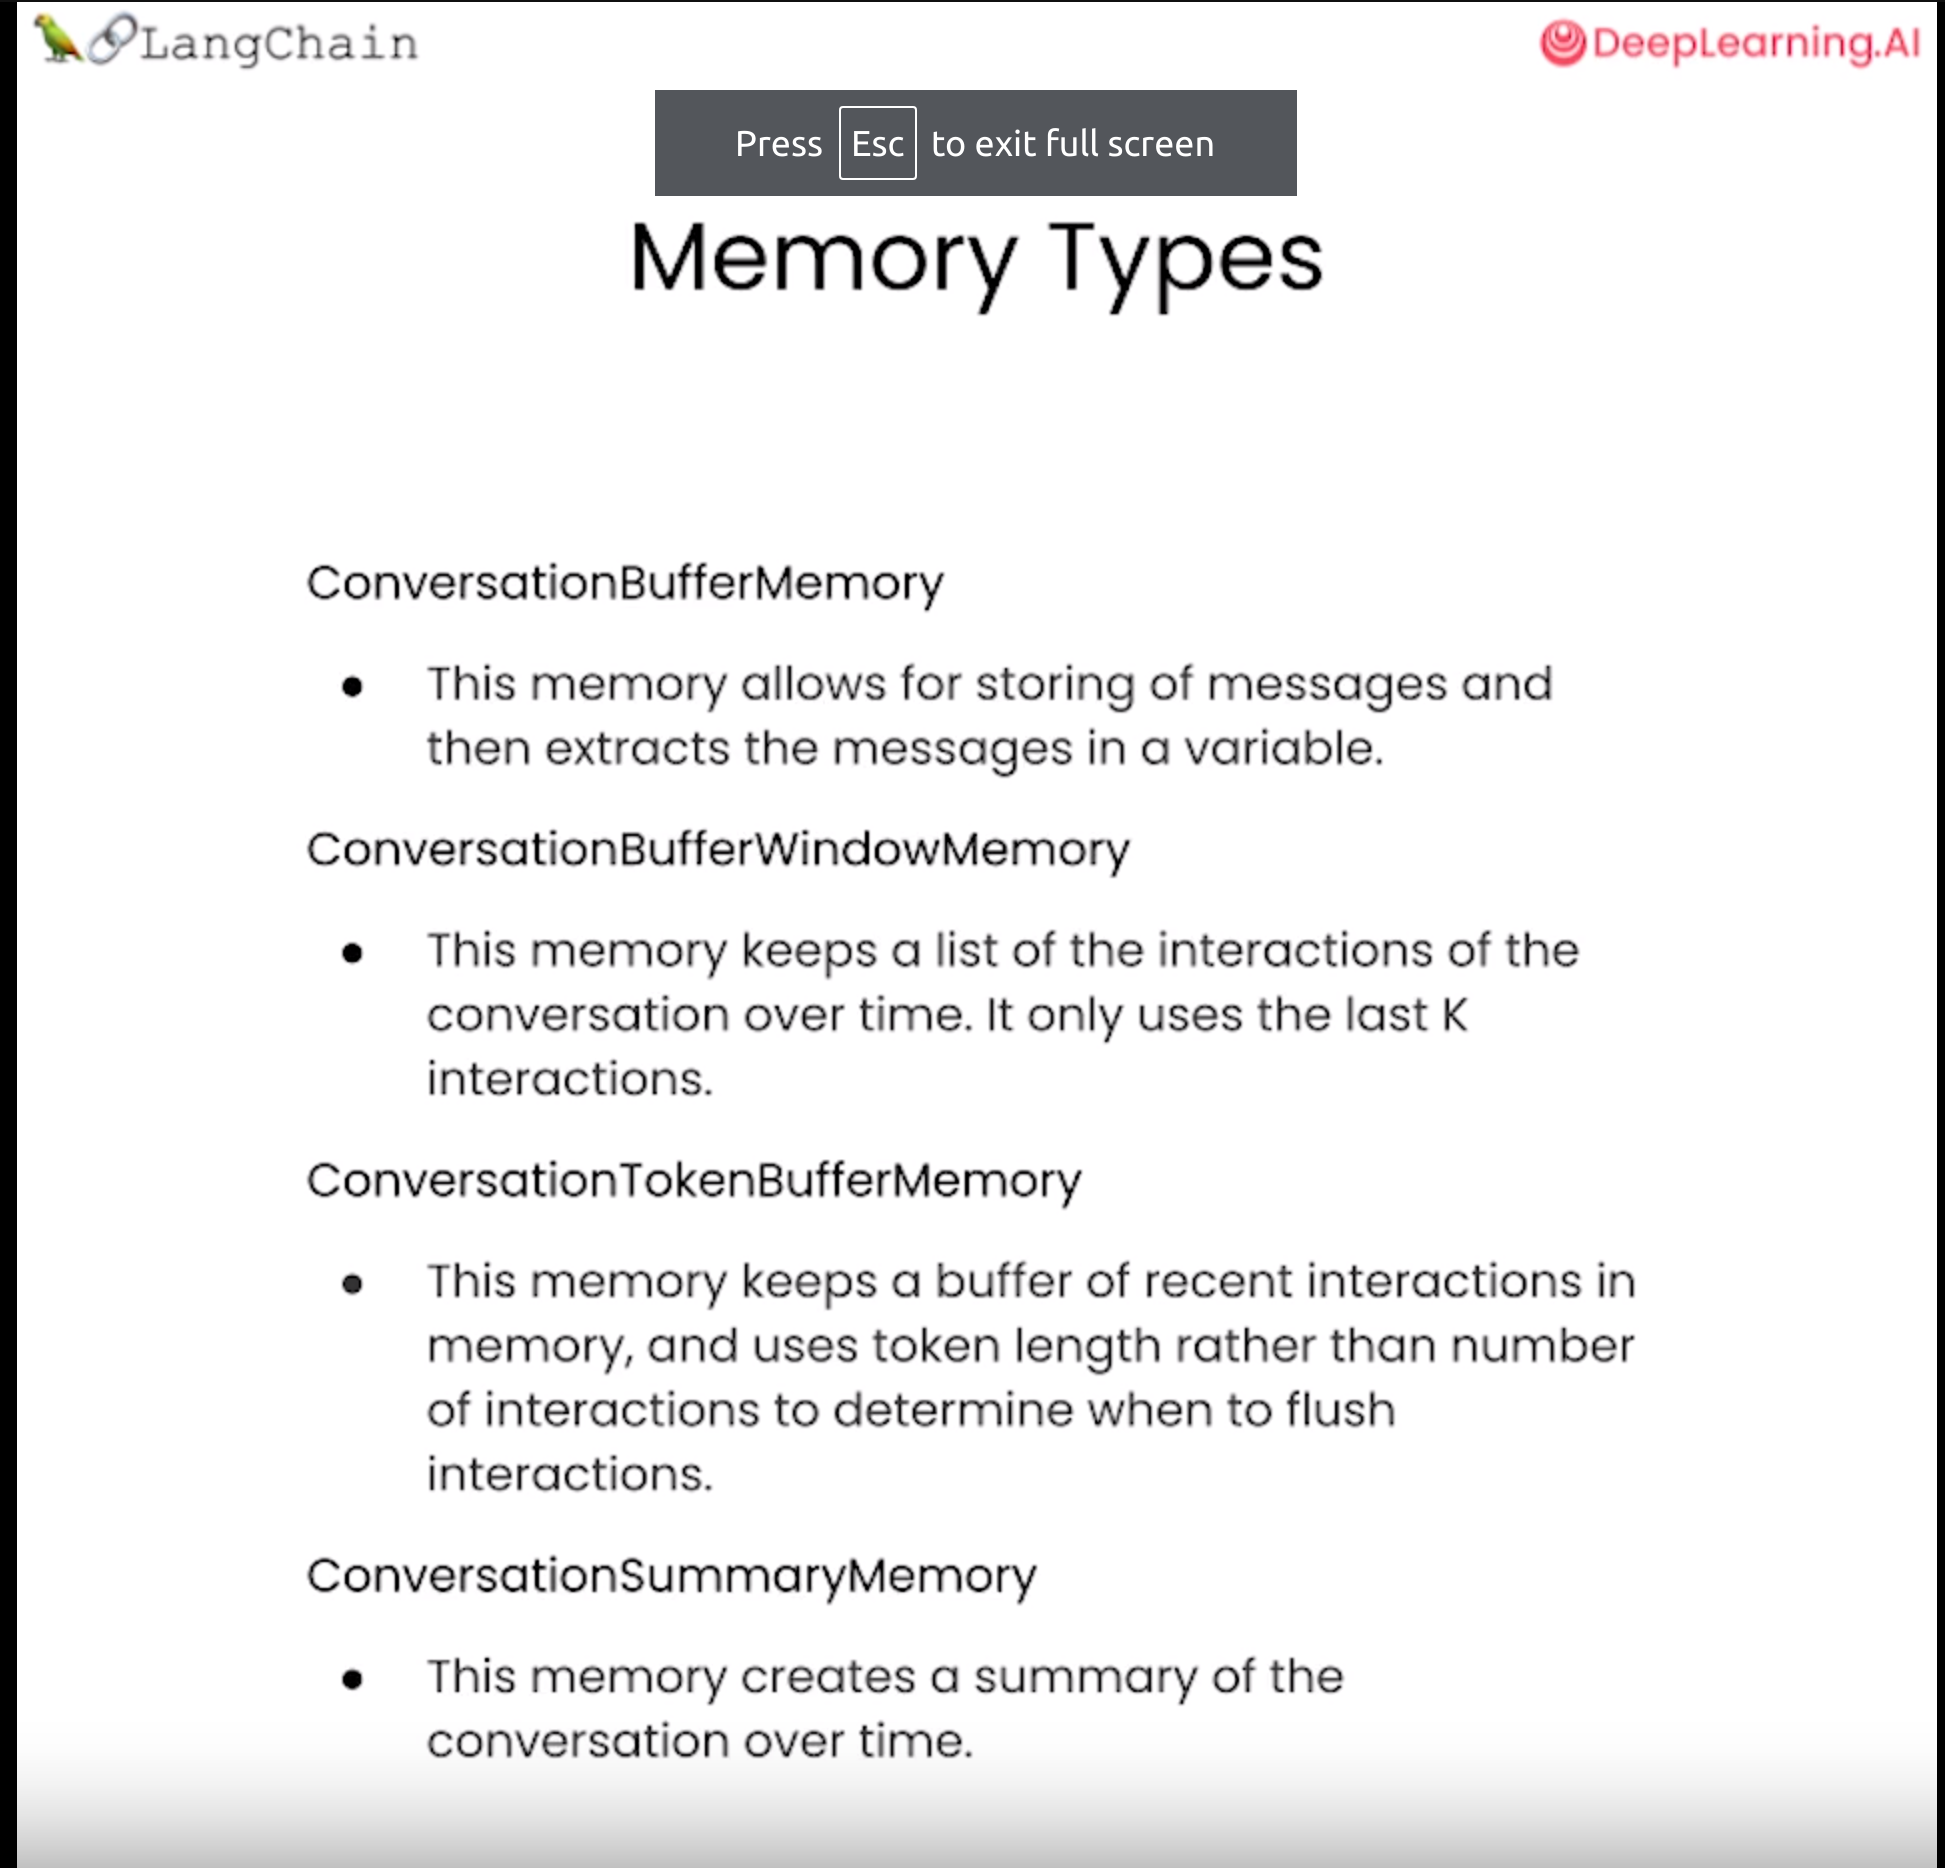

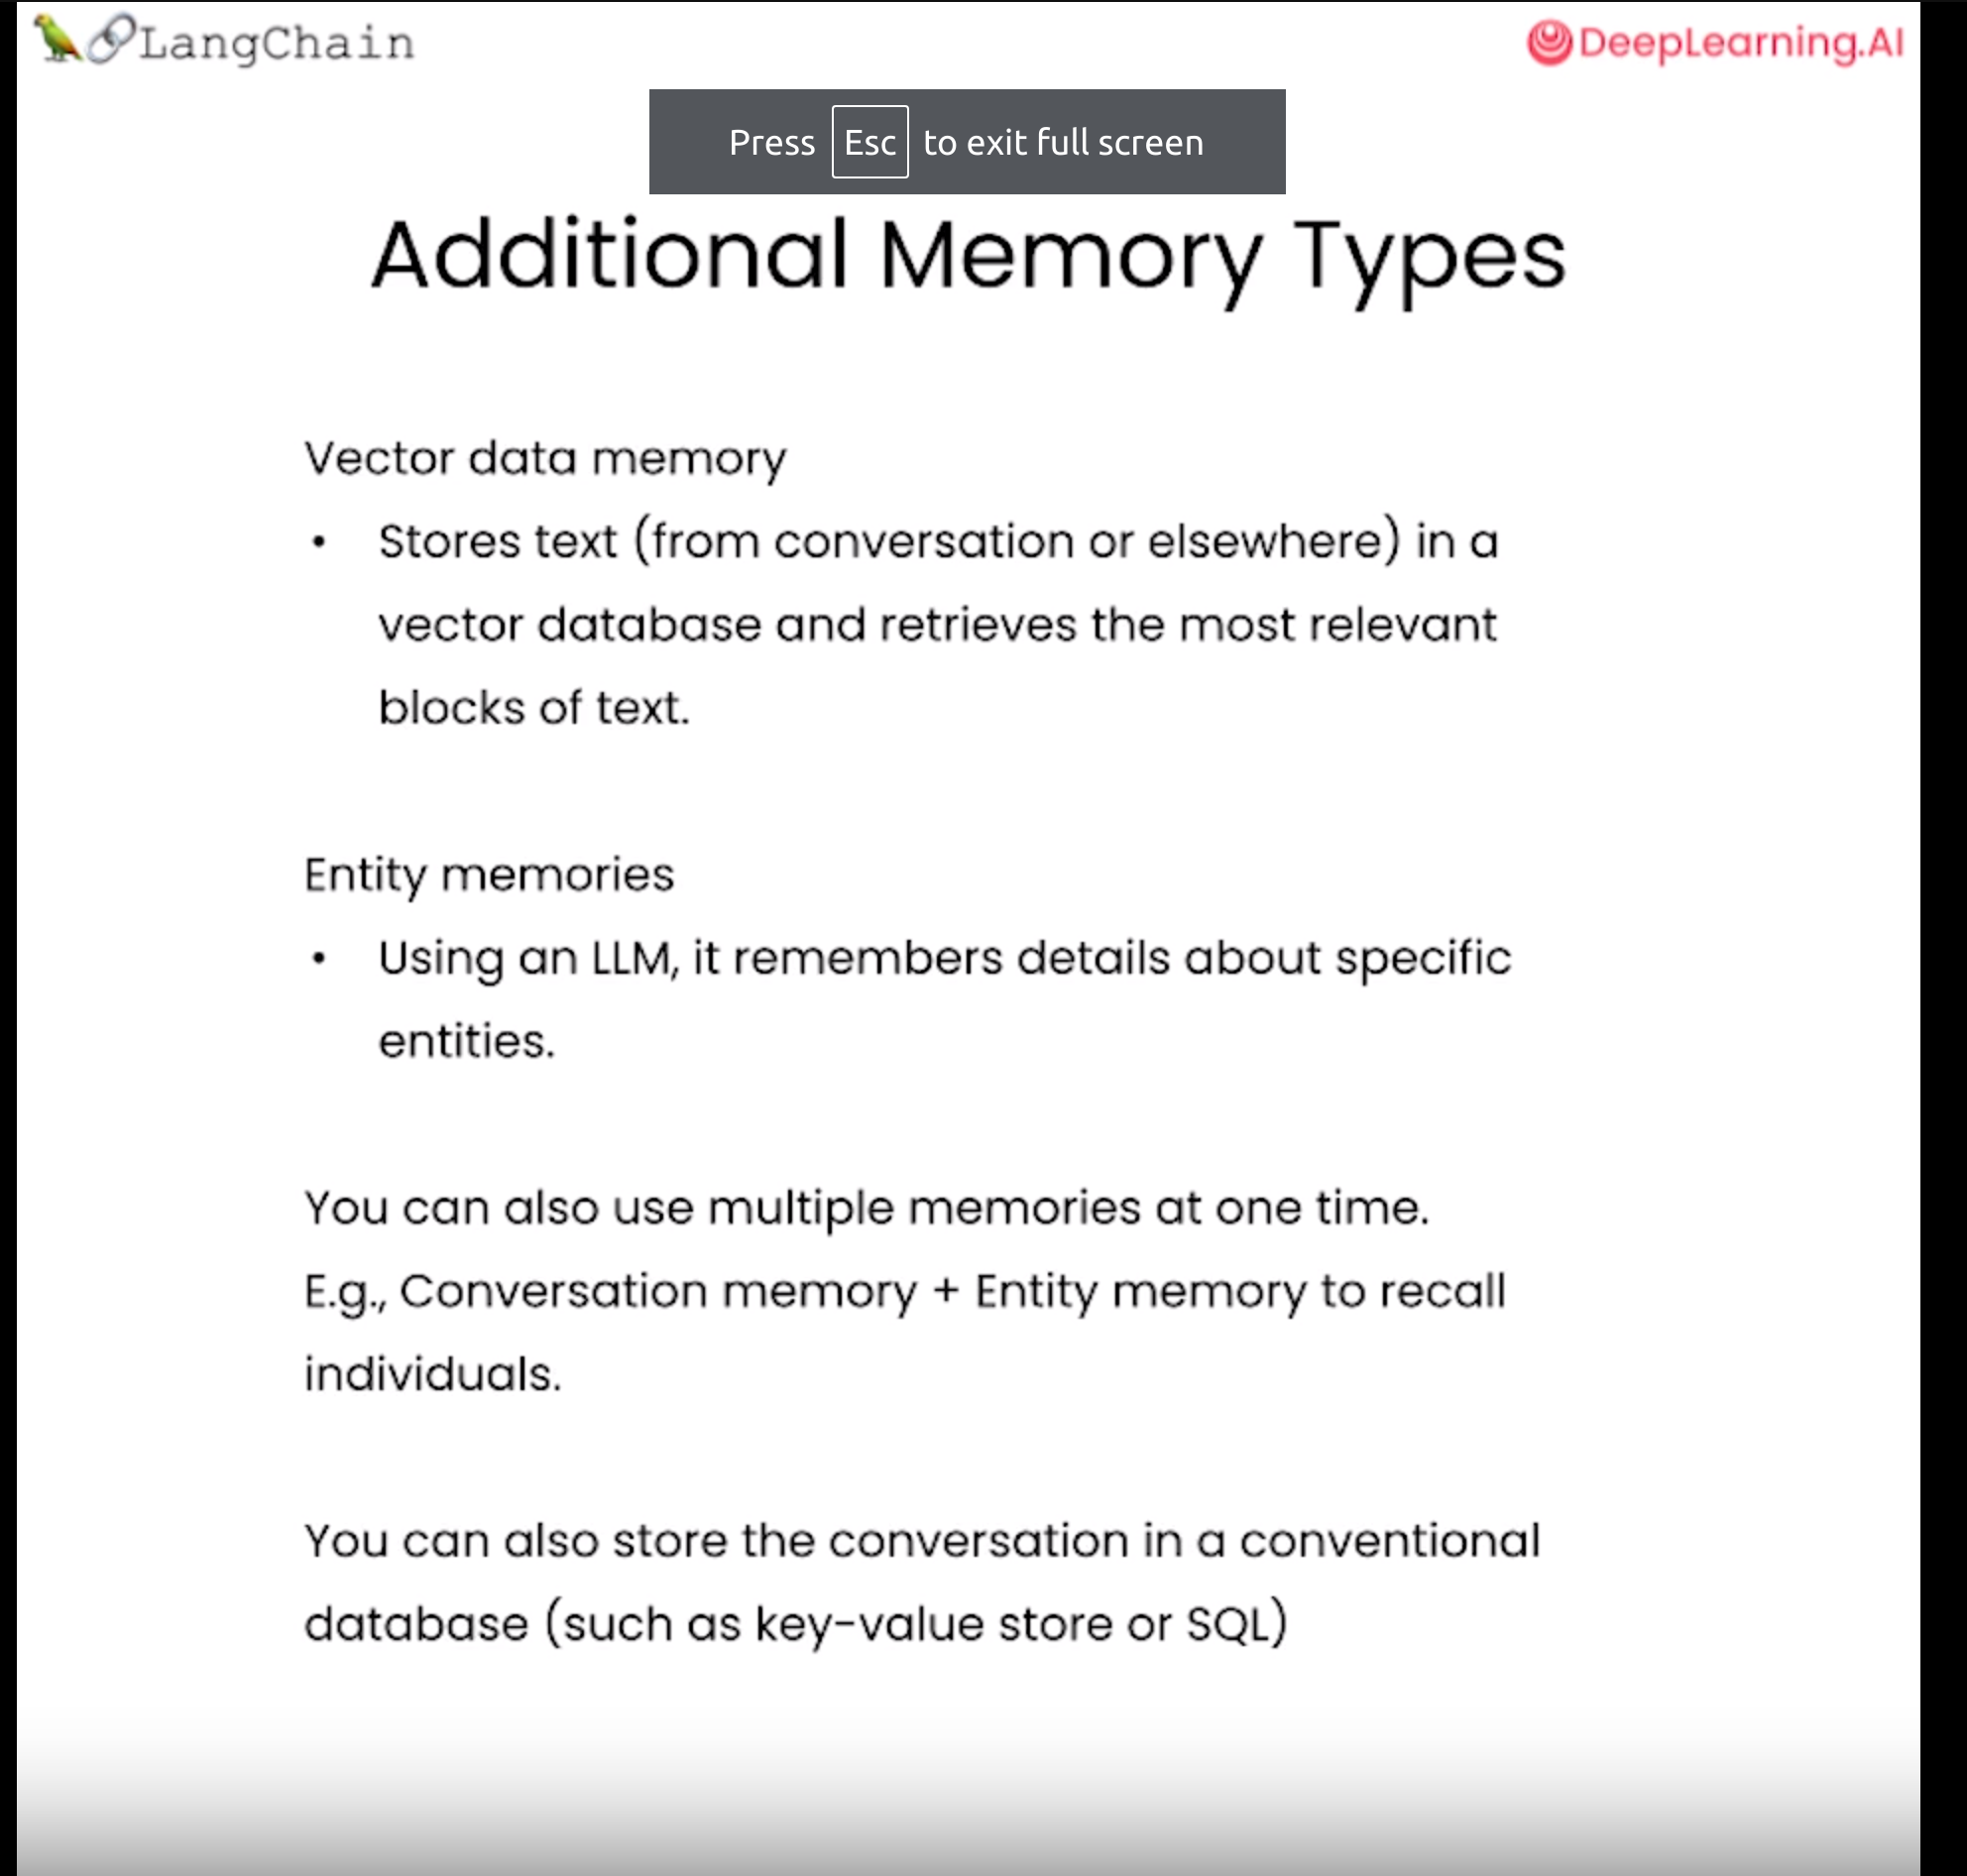